In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Masinsko_ucenje/Projekat/"

Mounted at /content/drive


In [ ]:
df=pd.read_csv(path+"zadatak1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100022 entries, 0 to 100021
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100022 non-null  int64  
 1   ID                        100022 non-null  object 
 2   Customer_ID               100022 non-null  object 
 3   Month                     100022 non-null  object 
 4   SSN                       100022 non-null  object 
 5   Occupation                100022 non-null  object 
 6   Annual_Income             100022 non-null  float64
 7   Monthly_Inhand_Salary     100022 non-null  float64
 8   Num_Bank_Accounts         100022 non-null  int64  
 9   Num_Credit_Card           100022 non-null  int64  
 10  Interest_Rate             100022 non-null  int64  
 11  Num_of_Loan               100022 non-null  int64  
 12  Type_of_Loan              100022 non-null  object 
 13  Delay_from_due_date       100022 non-null  i

**Dodatno sređivanje podataka**

In [ ]:
df=df.drop(columns='Unnamed: 0')
df=df.drop(columns='Name')
df=df.drop(columns='SSN')
df=df.drop(columns='ID')

In [ ]:
df.isna().sum()

Customer_ID                 0
Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Age                         0
Auto Loan                   0
Mortgage Loan               0
Student Loan                0
Credit-Builder Loan         0
Personal Loan               0
Home Equity Loan            0
Debt Consolidation Loan     0
Payday Loan                 0
Spent                       0
Payment   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100022 entries, 0 to 100021
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100022 non-null  object 
 1   Month                     100022 non-null  object 
 2   Occupation                100022 non-null  object 
 3   Annual_Income             100022 non-null  float64
 4   Monthly_Inhand_Salary     100022 non-null  float64
 5   Num_Bank_Accounts         100022 non-null  int64  
 6   Num_Credit_Card           100022 non-null  int64  
 7   Interest_Rate             100022 non-null  int64  
 8   Num_of_Loan               100022 non-null  int64  
 9   Type_of_Loan              100022 non-null  object 
 10  Delay_from_due_date       100022 non-null  int64  
 11  Num_of_Delayed_Payment    100022 non-null  int64  
 12  Changed_Credit_Limit      100022 non-null  float64
 13  Num_Credit_Inquiries      100022 non-null  f

In [ ]:
df.head()

,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Auto Loan,Mortgage Loan,Student Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Debt Consolidation Loan,Payday Loan,Spent,Payment
0,CUS_0xd40,January,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,True,False,False,True,True,True,False,False,High,Small
1,CUS_0xd40,February,Scientist,19114.12,3093.153333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,True,False,False,True,True,True,False,False,Low,Large
2,CUS_0xd40,March,Scientist,19114.12,3093.153333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,True,False,False,True,True,True,False,False,Low,Medium
3,CUS_0xd40,April,Scientist,19114.12,3093.153333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,True,False,False,True,True,True,False,False,Low,Small
4,CUS_0xd40,May,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,True,False,False,True,True,True,False,False,High,Medium


#**Implementacija knn algoritma**

Radi korištenja knn modela kategoričke varijable ćemo prebaciti u numberički oblik

In [ ]:
df1=pd.read_csv(path+"zadatak1.csv")

In [ ]:
print((df1['Credit_Score']=='Good').sum())
print((df1['Credit_Score']=='Standard').sum())
print((df1['Credit_Score']=='Poor').sum())

17832
53182
29008


In [ ]:
from sklearn import preprocessing
encoder=[] #kako bi mogli vratiti iz numeričkog oblika u kategorički
for i in df.columns:
  if(df[i].dtype=='object'):
    val=preprocessing.LabelEncoder()
    val.fit(df[i])
    df[i]=val.transform(df[i])
    encoder.append(val)


In [ ]:
y=df.Credit_Score
x=df.drop("Credit_Score",axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x)
x=mms.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=5)

In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,train_size=0.8,test_size=0.2,random_state=5)

In [ ]:
x_train.shape

(64013, 33)

In [ ]:
y_train.shape

(64013,)

In [ ]:
x_test.shape

(20005, 33)

In [ ]:
y_test.shape

(20005,)

In [ ]:
x_valid.shape

(16004, 33)

In [ ]:
y_valid.shape

(16004,)

#Klasifikacijski model zasnovan na knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,cohen_kappa_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
pipeline=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5))
pipeline.fit(x_train,y_train)
prediction_pipeline=pipeline.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,prediction_pipeline)*100,"%")
print("Cohen kappa:",cohen_kappa_score(y_test,prediction_pipeline))

Accuracy:  65.87853036740815 %
Cohen kappa: 0.42937156173333924


In [ ]:
for k in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=k,algorithm='auto',weights='uniform')
  model=knn.fit(x_train,y_train)
  prediction=model.predict(x_test)
  print("Accuracy: ",accuracy_score(y_test,prediction)*100,"%")
  print("Cohen kappa: ",{cohen_kappa_score(y_test,prediction)})

Accuracy:  60.21494626343414 %
Cohen kappa:  {0.3336873655587401}
Accuracy:  56.64083979005249 %
Cohen kappa:  {0.34266570548419506}
Accuracy:  61.21969507623094 %
Cohen kappa:  {0.3541832378700248}
Accuracy:  60.774806298425396 %
Cohen kappa:  {0.36461134691960484}
Accuracy:  61.54461384653837 %
Cohen kappa:  {0.35615343146450584}
Accuracy:  62.069482629342666 %
Cohen kappa:  {0.37259931251161416}
Accuracy:  62.10447388152962 %
Cohen kappa:  {0.3560953953221718}
Accuracy:  62.029492626843286 %
Cohen kappa:  {0.36585901643325835}
Accuracy:  62.124468882779304 %
Cohen kappa:  {0.35389927738265115}
Accuracy:  62.17445638590352 %
Cohen kappa:  {0.36049478843113547}
Accuracy:  62.374406398400396 %
Cohen kappa:  {0.3575490199759399}
Accuracy:  62.59935016245939 %
Cohen kappa:  {0.36414490049447423}
Accuracy:  62.90427393151712 %
Cohen kappa:  {0.36241430315648004}
Accuracy:  62.78930267433142 %
Cohen kappa:  {0.36558017332015447}
Accuracy:  62.63934016495875 %
Cohen kappa:  {0.3577954213427

In [ ]:
knn=KNeighborsClassifier(n_neighbors=18,algorithm='auto',weights='uniform')
model=knn.fit(x_train,y_train)
prediction=model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,prediction)*100,"%")
print("Cohen kappa: ",{cohen_kappa_score(y_test,prediction)})

Accuracy:  62.969257685578604 %
Cohen kappa:  {0.3624835864206464}


Procjena performanski pomoću konfuzijske matrice

In [ ]:
cm=confusion_matrix(y_test,prediction)

In [ ]:
print(cm)

[[1672   90 1743]
 [ 466 2866 2423]
 [1183 1544 8018]]


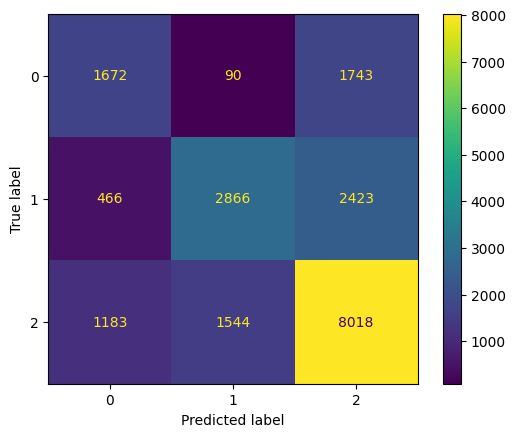

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
cr1=classification_report(y_test,prediction)
print("Klasifikacijski izvjestaj")
print(cr1)

Klasifikacijski izvjestaj
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      3505
           1       0.64      0.50      0.56      5755
           2       0.66      0.74      0.70     10745

    accuracy                           0.63     20005
   macro avg       0.60      0.58      0.59     20005
weighted avg       0.63      0.63      0.62     20005



Tuniranje parametara

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import math
knn=KNeighborsClassifier()
param_grid={
    'n_neighbors' : [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
    'weights': ['distance', 'uniform'],
    'algorithm': ['auto'],
    'metric': ['cityblock','euclidean','manhattan','minkowski','chebyshev','l1','l2']
}
clf_GS=GridSearchCV(knn,param_grid,cv=[(np.arange(0,64013),np.arange(80017,100022))],verbose=3)
print(clf_GS.get_params().keys())
clf_GS.fit(x,y)
print(clf_GS.best_estimator_.get_params())

print(clf_GS.best_estimator_.get_params()['n_neighbors'])
print(clf_GS.best_estimator_.get_params()['weights'])
print(clf_GS.best_estimator_.get_params()['algorithm'])
print(clf_GS.best_estimator_.get_params()['metric'])
print(clf_GS.best_score_)

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
Fitting 1 folds for each of 294 candidates, totalling 294 fits
[CV 1/1] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=distance;, score=0.573 total time= 1.1min
[CV 1/1] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=uniform;, score=0.567 total time= 1.1min
[CV 1/1] END algorithm=auto, metric=cityblock, n_neighbors=6, weights=distance;, score=0.579 total time= 1.1min
[CV 1/1] END algorithm=auto, metric=cityblock, n_neighbors=6, weights=uniform;, score=0.579 total time= 1.1min
[CV 1/1] END algorithm=auto, metric=cityblock, n_neighbors=7, weights=distance;, score=0.584 total time= 1.1min
[CV 1/1] END algorithm=auto, metric=cityblock, n_neighbors

Oversampling i Undersampling

Original dataset:  Counter({2: 33962, 1: 18613, 0: 11438})


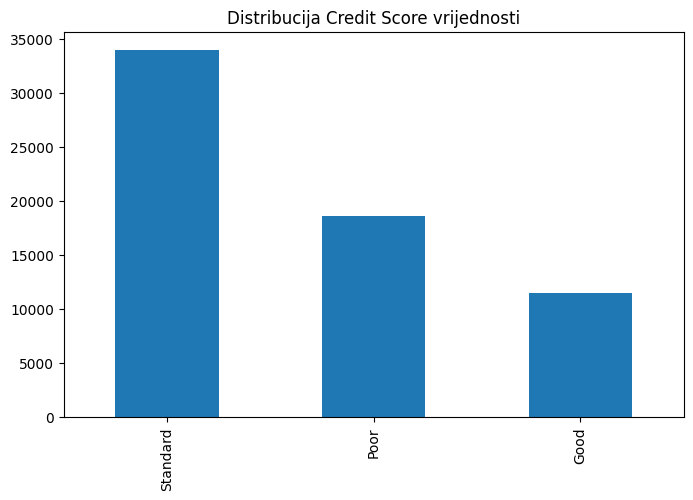

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

counter=Counter(y_train)
print("Original dataset: ",counter)
figure,a=plt.subplots(figsize=(8,5))
y_train.value_counts().plot(kind='bar',ax=a,title="Distribucija Credit Score vrijednosti")
a.set_xticklabels(['Standard','Poor','Good'])
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Oversampled dataset:  Counter({1: 33962, 2: 33962, 0: 33962})


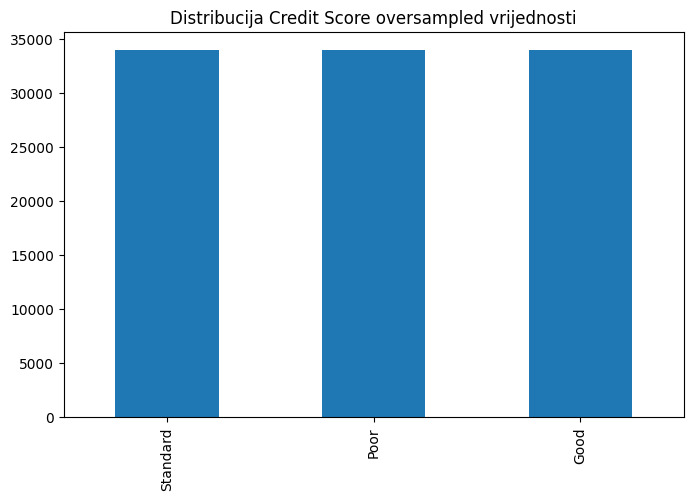

In [ ]:
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x_train,y_train)
figure,a=plt.subplots(figsize=(8,5))
print("Oversampled dataset: ",Counter(y_res))
y_res.value_counts().plot(kind='bar',ax=a,title="Distribucija Credit Score oversampled vrijednosti")
a.set_xticklabels(['Standard','Poor','Good'])
plt.show()

Undersampled dataset:  Counter({0: 11438, 1: 11438, 2: 11438})


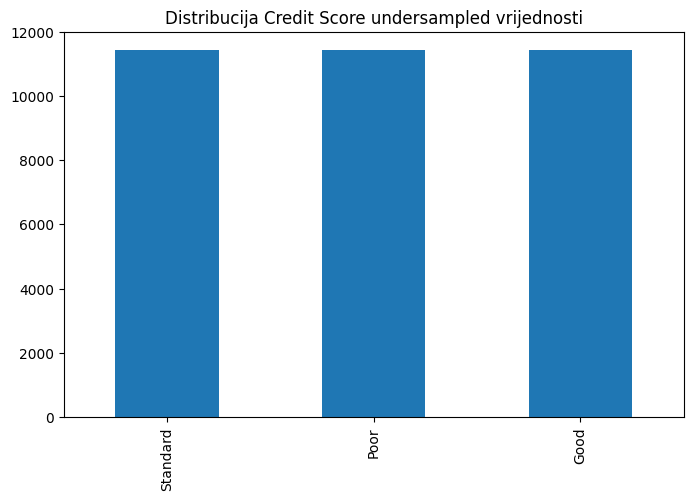

In [ ]:
rus=RandomUnderSampler(random_state=42)
x_resampled,y_resampled=rus.fit_resample(x_train,y_train)
figure,a=plt.subplots(figsize=(8,5))
print("Undersampled dataset: ",Counter(y_resampled))
y_resampled.value_counts().plot(kind='bar',ax=a,title="Distribucija Credit Score undersampled vrijednosti")
a.set_xticklabels(['Standard','Poor','Good'])
plt.show()

In [ ]:
r1knn=KNeighborsClassifier(n_neighbors=25,weights='uniform',algorithm='auto',metric='cityblock')
r1knn.fit(x_res,y_res)
prediction=r1knn.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,prediction)*100,"%")
print("Cohen Kappa: ",{cohen_kappa_score(y_test,prediction)})
cm2=confusion_matrix(y_test,prediction)
print(cm2)

Accuracy:  60.7298175456136 %
Cohen Kappa:  {0.4165901856551728}
[[2912  140  453]
 [ 889 4161  705]
 [3051 2618 5076]]


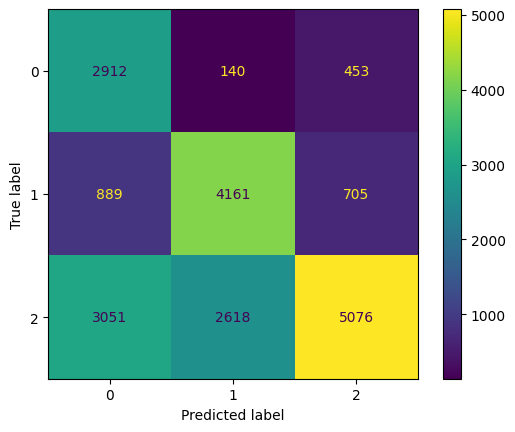

In [ ]:
disp2=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=r1knn.classes_)
disp2.plot()
plt.show()

In [ ]:
r2knn=KNeighborsClassifier(n_neighbors=25,weights='uniform',algorithm='auto',metric='cityblock')
r2knn.fit(x_resampled,y_resampled)
prediction=r2knn.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,prediction)*100,"%")
print("Cohen Kappa: ",{cohen_kappa_score(y_test,prediction)})
cm3=confusion_matrix(y_test,prediction)
print(cm3)

Accuracy:  57.625593601599604 %
Cohen Kappa:  {0.3771491321566791}
[[2961  118  426]
 [1031 3919  805]
 [3356 2741 4648]]


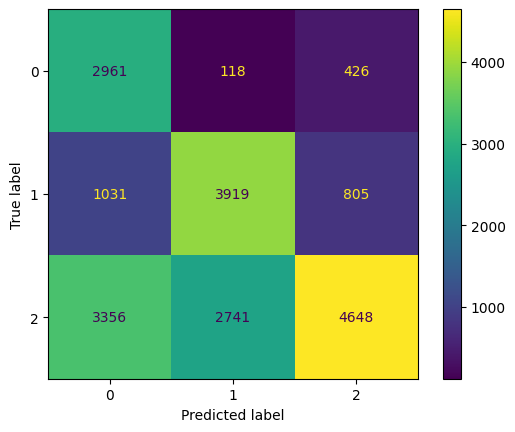

In [ ]:
disp3=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=r2knn.classes_)
disp3.plot()
plt.show()

**Cross-validacija**

In [ ]:
from sklearn.model_selection import cross_validate
knn_cv=KNeighborsClassifier(n_neighbors=25)
cv_scores=cross_validate(knn_cv,x_train,y_train,cv=10,return_train_score=True)
train_scores=cv_scores['train_score']
test_scores=cv_scores['test_score']
knn.fit(x_train,y_train)
validation_score=knn.score(x_valid,y_valid)
print("Rezultat unakrsne validacije:")
print("Train scores: ",train_scores)
print("Test scores: ",test_scores)
print("Rezultat na validacijskom skupu: ",validation_score)


Rezultat unakrsne validacije:
Train scores:  [0.66925868 0.66825891 0.66927103 0.67013503 0.67033252 0.66953023
 0.66991286 0.66987583 0.66875262 0.66917228]
Test scores:  [0.5875361  0.58498112 0.57676072 0.5875361  0.5670962  0.58164852
 0.5736503  0.57798267 0.58620307 0.5892024 ]
Rezultat na validacijskom skupu:  0.6747063234191452
